**_Section 7.0:_** Load packages

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics
from sklearn import cross_validation
from sklearn import grid_search
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style("darkgrid")

/Users/dat-44pt/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/dat-44pt/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### _Section 7.1_
#### Create sample data and fit a model
```diff
+ The following section provides an opportunity for the student to use a loss function (MSE) to differentiate between two models - one trained on normal data and one trained on biased data.
```

In [2]:
df = pd.DataFrame({'x': range(100), 'y': range(100)})
biased_df  = df.copy()
biased_df.loc[:20, 'x'] = 1
biased_df.loc[:20, 'y'] = 1

def append_jitter(series):
    jitter = np.random.random_sample(size=100)
    return series + jitter

df['x'] = append_jitter(df.x)
df['y'] = append_jitter(df.y)

biased_df['x'] = append_jitter(biased_df.x)
biased_df['y'] = append_jitter(biased_df.y)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a174e8110>,
      dtype=object)

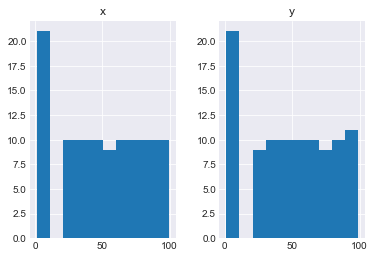

In [3]:
biased_df.hist()

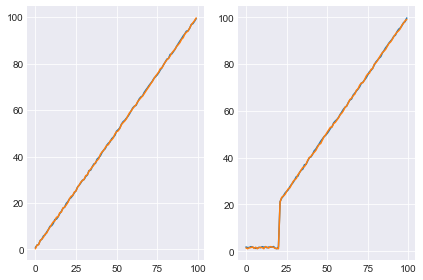

In [4]:
plt.subplot(121)
plt.plot(df)
plt.subplot(122)
plt.plot(biased_df)

plt.tight_layout()
plt.show()

In [5]:
## fit
lm = linear_model.LinearRegression().fit(df[['x']], df['y'])
print metrics.mean_squared_error(df['y'], lm.predict(df[['x']]))

0.12713199432198313


In [6]:
## biased fit
lm = linear_model.LinearRegression().fit(biased_df[['x']], biased_df['y'])
print metrics.mean_squared_error(biased_df['y'], lm.predict(biased_df[['x']]))

0.15297453691823762


### _Section 7.2_
#### Cross validation
Intro to cross validation with bike share data from last time. We will be modeling casual ridership. 
```diff
+ The following section provides an opportunity for the student to use cross validation, and to observe how it allows us to iteratively evaluate a model on a test set using a loss function to estimate generalizability.
```

In [7]:
wd = './datasets/'
bikeshare = pd.read_csv(wd + 'bikeshare.csv')

#### Create dummy variables and set outcome (dependent) variable

In [8]:
weather = pd.get_dummies(bikeshare.weathersit, prefix='weather')
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])
y = bikeshare.casual 

#### Create a cross validation with 5 folds

In [9]:
kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True)

In [10]:
mse_values = []
scores = []
n= 0
print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    scores.append(lm.score(modeldata, y))
    n += 1
    print('Model', n)
    print('MSE:', mse_values[n-1])
    print('R2:', scores[n-1])

print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds:', np.mean(mse_values))
print('Mean of R2 for all folds:', np.mean(scores))

~~~~ CROSS VALIDATION each fold ~~~~
('Model', 1)
('MSE:', 1647.3505525956996)
('R2:', 0.31186997207412703)
('Model', 2)
('MSE:', 1854.0657218343313)
('R2:', 0.31182853030878255)
('Model', 3)
('MSE:', 1590.7632161455308)
('R2:', 0.31188906878813016)
('Model', 4)
('MSE:', 1644.1360633532665)
('R2:', 0.3119150428763232)
('Model', 5)
('MSE:', 1633.0294617956897)
('R2:', 0.3118754914459365)
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
('Mean of MSE for all folds:', 1673.8690031449034)
('Mean of R2 for all folds:', 0.3118756210986599)


In [11]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print("~~~~ Single Model ~~~~")
print('MSE of single model:', metrics.mean_squared_error(y, lm.predict(modeldata)))
print('R2: ', lm.score(modeldata, y))

~~~~ Single Model ~~~~
('MSE of single model:', 1672.5811076539349)
('R2: ', 0.3119346059890644)


KFold returns an 80:20 train:test split

In [12]:
total = len(test_index)+len(train_index)
print(float(len(train_index))/total)
print(float(len(test_index))/total)

0.800046032568
0.199953967432


### Check
While the cross validated approach here generated more overall error, which of the two approaches would predict new data more accurately: the single model or the cross validated, averaged one? Why?


Answer: accuracy would be lower with the single model case, but we're trading off bias error for generalized error

### _Section 7.3_
#### Activity: Cross Validation with Linear Regression
```diff
+ The following section provides an opportunity for the student to build on the application of cross validation, by manually optimizing one of the parameters: k
```
Note:  
**Shuffle** (boolean, optional)- Dictates whether to shuffle the data before splitting into batches

In [13]:
overall_mse = []
overall_scores = []

n_vals = range(2, 51, 2)

for n in n_vals:

    mse_values = []
    scores = []

    kf_n = cross_validation.KFold(len(modeldata), n_folds=n, shuffle=True)

    print("~~~~ CROSS VALIDATION each fold count ~~~~")
    for train_index, test_index in kf_n:
        # Fit model
        lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
        # Aggregate scores
        mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
        scores.append(lm.score(modeldata, y))
        n+=1 # iterate counter

    print('Mean of MSE for ', np.str(n), '-fold: ', np.mean(mse_values))
    print('Mean of R2 for ', np.str(n), '-fold:', np.mean(scores))
    
    overall_mse.append(np.mean(mse_values))
    overall_scores.append(np.mean(scores))

~~~~ CROSS VALIDATION each fold count ~~~~
('Mean of MSE for ', '4', '-fold: ', 1672.7465423358653)
('Mean of R2 for ', '4', '-fold:', 0.31191203427194075)
~~~~ CROSS VALIDATION each fold count ~~~~
('Mean of MSE for ', '8', '-fold: ', 1673.6974361193054)
('Mean of R2 for ', '8', '-fold:', 0.3118685564794305)
~~~~ CROSS VALIDATION each fold count ~~~~
('Mean of MSE for ', '12', '-fold: ', 1673.1431273512717)
('Mean of R2 for ', '12', '-fold:', 0.311913449945283)
~~~~ CROSS VALIDATION each fold count ~~~~
('Mean of MSE for ', '16', '-fold: ', 1673.6614960523875)
('Mean of R2 for ', '16', '-fold:', 0.31190503639248457)
~~~~ CROSS VALIDATION each fold count ~~~~
('Mean of MSE for ', '20', '-fold: ', 1673.655636901111)
('Mean of R2 for ', '20', '-fold:', 0.3119113034405984)
~~~~ CROSS VALIDATION each fold count ~~~~
('Mean of MSE for ', '24', '-fold: ', 1673.2048817717416)
('Mean of R2 for ', '24', '-fold:', 0.31192357406871085)
~~~~ CROSS VALIDATION each fold count ~~~~
('Mean of MSE for 

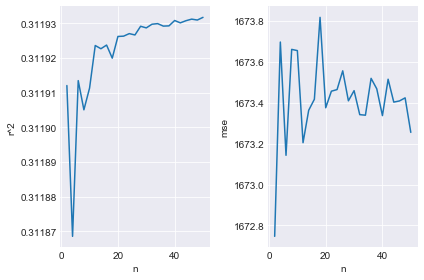

In [14]:
plt.subplot(121)
plt.plot(n_vals, overall_scores)
plt.xlabel('n')
plt.ylabel('r^2')
plt.subplot(122)
plt.plot(n_vals, overall_mse)
plt.xlabel('n')
plt.ylabel('mse')

plt.tight_layout()
plt.show()

### _Section 7.4_
#### There are ways to improve our model with regularization
```diff
+ The following section provides an opportunity for the student to try out different regularization methods discussed in today's lecture, and then optimize the parameters (first manually, then using gridsearch). 

+ Grid-search is a way of optimizing our models, by iteratively evaluating the model at each position in a grid of parameters.
```
Let's check out the effects on MSE and R2

In [15]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print("~~~ OLS ~~~")
print('OLS MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata)))
print('OLS R2:', lm.score(modeldata, y))

lm = linear_model.Lasso().fit(modeldata, y)
print("~~~ Lasso ~~~")
print('Lasso MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata)))
print('Lasso R2:', lm.score(modeldata, y))

lm = linear_model.Ridge().fit(modeldata, y)
print("~~~ Ridge ~~~")
print('Ridge MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata)))
print('Ridge R2:', lm.score(modeldata, y))

~~~ OLS ~~~
('OLS MSE: ', 1672.5811076539349)
('OLS R2:', 0.3119346059890644)
~~~ Lasso ~~~
('Lasso MSE: ', 1725.4158160809566)
('Lasso R2:', 0.2901994959217963)
~~~ Ridge ~~~
('Ridge MSE: ', 1672.6049011306602)
('Ridge R2:', 0.3119248178431484)


#### Figuring out the alphas can be done by "hand"

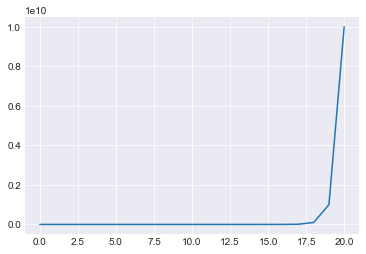

In [16]:
plt.plot(np.logspace(-10, 10, 21))

In [17]:
alphas = range(-100, 100, 10)
for a in alphas:
    print 'Alpha:', a
    lm = linear_model.Ridge(alpha=a)
    lm.fit(modeldata, y)
    print lm.coef_
    print metrics.mean_squared_error(y, lm.predict(modeldata))

Alpha: -100
[ 133.05172379 -102.78636303   -5.02411254    1.83553098    4.15226377]
1699.5659130337008
Alpha: -90
[ 130.68613688 -100.51870448   -4.61856497    1.8597224     3.79388537]
1693.5957059785492
Alpha: -80
[128.40307982 -98.35287965  -4.22453836   1.8889227    3.46164303]
1688.5647651496079
Alpha: -70
[126.19833442 -96.28210216  -3.83804563   1.92607334   3.15703831]
1684.3787057275254
Alpha: -60
[124.0679589  -94.30017609  -3.4532916    1.97601141   2.88359338]
1680.9534347666904
Alpha: -50
[122.00826289 -92.4014306   -3.0607161    2.04741746   2.64878632]
1678.2139007744997
Alpha: -40
[120.01578045 -90.58065958  -2.64204369   2.15775747   2.46898336]
1676.0930441928685
Alpha: -30
[118.08723096 -88.83305807  -2.15511182   2.34844713   2.3845981 ]
1674.530981628591
Alpha: -20
[116.2194168  -87.15411738  -1.47081643   2.7478975    2.52314926]
1673.4747216030314
Alpha: -10
[ 1.14408551e+02 -8.55391106e+01  1.10214473e-01  4.05481616e+00
  3.58271513e+00]
1672.8817065689623
Alph

#### Or we can use grid search to make this faster

In [18]:
from sklearn import grid_search

alphas = range(-100, 100, 10)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='neg_mean_squared_error')

gs.fit(modeldata, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

Best score 

In [19]:
print(gs.best_score_)

-1809.61327123


Mean squared error here comes in negative, so let's make it positive

In [20]:
print(-gs.best_score_)

1809.61327123


Explain which grid_search setup worked best

In [21]:
print(gs.best_estimator_)

Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


Show all the grid pairings and their performances

In [22]:
print(gs.grid_scores_)

[mean: -1973.97095, std: 369.03439, params: {'alpha': -100}, mean: -1942.09943, std: 384.70463, params: {'alpha': -90}, mean: -1915.47022, std: 402.57905, params: {'alpha': -80}, mean: -1893.27381, std: 421.42792, params: {'alpha': -70}, mean: -1874.84112, std: 440.46744, params: {'alpha': -60}, mean: -1859.61591, std: 459.21585, params: {'alpha': -50}, mean: -1847.13328, std: 477.38893, params: {'alpha': -40}, mean: -1837.00282, std: 494.82918, params: {'alpha': -30}, mean: -1828.89547, std: 511.45967, params: {'alpha': -20}, mean: -1822.53505, std: 527.25506, params: {'alpha': -10}, mean: -1817.58711, std: 542.14315, params: {'alpha': 0}, mean: -1814.09369, std: 556.35563, params: {'alpha': 10}, mean: -1811.66687, std: 569.73223, params: {'alpha': 20}, mean: -1810.21570, std: 582.37131, params: {'alpha': 30}, mean: -1809.61327, std: 594.31589, params: {'alpha': 40}, mean: -1809.74854, std: 605.60862, params: {'alpha': 50}, mean: -1810.52497, std: 616.29113, params: {'alpha': 60}, mea

#### Grid search cv, solving for alpha

In [23]:
alphas = range(-100, 100, 10)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas, 'fit_intercept': [True, False]},
    scoring='neg_mean_squared_error')

gs.fit(modeldata, y)

print -gs.best_score_ 
print gs.best_estimator_

1808.40768429
Ridge(alpha=40, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


### _Section 7.5_
#### Gradient Descent

In [24]:
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
while not optimized:
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print 'found better solution! using', current_distance
        a += 1
    else:
        optimized = True
        print start, 'is closest to', num_to_approach


5.2 is better than 6.2
found better solution! using 5.2
4.2 is better than 5.2
found better solution! using 4.2
3.2 is better than 4.2
found better solution! using 3.2
2.2 is better than 3.2
found better solution! using 2.2
1.2000000000000002 is better than 2.2
found better solution! using 1.2000000000000002
0.20000000000000018 is better than 1.2
found better solution! using 0.20000000000000018
6.0 is closest to 6.2


For the DP example below, we've taken the code above and implemented a stopping point, similar to what n_iter would do in gradient descent.

There is a trade-off between stopping early and still _mostly_ getting the right result vs. taking a longer time to solve and having a more precise model.

One solution is below.

In [25]:
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
n_iter = 0
while not optimized:
    if n_iter > 3:
        print('stopping iterations')
        break
    n_iter += 1
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print(distance, 'is better than', current_distance)
            current_distance = distance
            start = n
    if got_better:
        print('found better solution! using', current_distance)
        a += 1
    else:
        optimized = True
        print(start, 'is closest to', num_to_approach)


(5.2, 'is better than', 6.2)
('found better solution! using', 5.2)
(4.2, 'is better than', 5.2)
('found better solution! using', 4.2)
(3.2, 'is better than', 4.2)
('found better solution! using', 3.2)
(2.2, 'is better than', 3.2)
('found better solution! using', 2.2)
stopping iterations


#### Demo: Application of Gradient Descent 

In [26]:
lm = linear_model.SGDRegressor(max_iter=10, tol=None)
lm.fit(modeldata, y)
print("Gradient Descent R2:", lm.score(modeldata, y))
print("Gradient Descent MSE:", metrics.mean_squared_error(y, lm.predict(modeldata)))

lm = linear_model.LinearRegression()
lm.fit(modeldata, y)
print('OLS R2:', lm.score(modeldata, y))
print('OLS MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata)))

('Gradient Descent R2:', 0.31048936016271245)
('Gradient Descent MSE:', 1676.0942778934393)
('OLS R2:', 0.3119346059890644)
('OLS MSE: ', 1672.5811076539349)


#### Check: 
- Untuned, how well did gradient descent perform compared to OLS?

See above

Answer: slightly lower R2 for GD, MSE is slightly higher (and _more variable_) for GD

- But the pay-off with GD comes when using __large__ datasets

### _Section 7.6_
#### Independent Practice: Bike data revisited

There are tons of ways to approach a regression problem. The regularization techniques appended to ordinary least squares optimizes the size of coefficients to best account for error. Gradient Descent also introduces learning rate (how aggressively do we solve the problem), epsilon (at what point do we say the error margin is acceptable), and iterations (when should we stop no matter what?)

For this deliverable, our goals are to:

- implement the gradient descent approach to our bike-share modeling problem,
- show how gradient descent solves and optimizes the solution,
- demonstrate the grid_search module!

While exploring the Gradient Descent regressor object, you'll build a grid search using the stochastic gradient descent estimator for the bike-share data set. Continue with either the model you evaluated last class or the simpler one from today. In particular, be sure to implement the "param_grid" in the grid search to get answers for the following questions:

- With a set of alpha values between 10^-10 and 10^-1, how does the mean squared error change?
- Based on the data, we know when to properly use l1 vs l2 regularization. By using a grid search with l1_ratios between 0 and 1 (increasing every 0.05), does that statement hold true? If not, did gradient descent have enough iterations?
- How do these results change when you alter the learning rate (eta0)?

**Bonus**: 
- Can you see the advantages and disadvantages of using gradient descent after finishing this exercise?

#### Independent Practice Starter Code

In [27]:
params = {} # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

print 'BEST ESTIMATOR'
print -gs.best_score_
print gs.best_estimator_
print 'ALL ESTIMATORS'
print gs.grid_scores_

BEST ESTIMATOR
1689.81112163
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)
ALL ESTIMATORS
[mean: -1689.81112, std: 65.74602, params: {}]


/Users/dat-44pt/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


#### Independent Practice Solution

This code shows the variety of challenges and some student gotchas. The plots will help showcase what should be learned.

1. With a set of alpha values between 10^-10 and 10^-1, how does the mean squared error change?
2. We know when to properly use l1 vs l2 regularization based on the data. 
    - When l1_ratio = 0 the penalty is an L2 penalty  
    - For l1_ratio = 1 it is an L1 penalty   
    - For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2  
By using a grid search with l1_ratios between 0 and 1 (increasing every 0.05), does our answer to #1 hold true?
 * (if it didn't look like it, did gradient descent have enough iterations?)
3. How do results change when you alter the learning rate (power_t)?

In [28]:
alphas = np.logspace(-10, -1, 10)
alphas

array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01])

In [29]:
alphas = np.logspace(-10, -1, 10)
print alphas
params = {'alpha':alphas, } # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

grid = pd.DataFrame(gs.grid_scores_)
grid.columns = ['alpha', 'mean_squared_error', 'cv']
grid['alpha'] = grid['alpha'].apply(lambda x: x['alpha'])
grid['mean_squared_error'] = grid['mean_squared_error'].apply(lambda x: -x)

[1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]


With the alphas available, it looks like at mean squared error stays generally flat with incredibly small alpha values, but starting at $10^{-3}$, the error begins to elbow. We probably don't have much of a different in performance with other alpha values. 

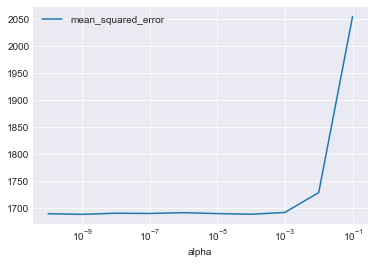

In [30]:
grid.plot('alpha', 'mean_squared_error', logx=True)

At alpha values of either .1 or 1, the l1_ratio works best closer to 1! Interesting. At other values of alpha they should see similar results, though the graphs aren't as clear.

In [31]:
l1_2_ratios = [float(i) / 100 for i in range(0, 101, 5)]
print l1_2_ratios
params = {'l1_ratio':l1_2_ratios, 'penalty': ['elasticnet'], 'alpha': [.1], 'max_iter': [50]}
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

grid = pd.DataFrame(gs.grid_scores_)
grid.columns = ['l1_ratio', 'mean_squared_error', 'cv']
grid['l1_ratio'] = grid['l1_ratio'].apply(lambda x: x['l1_ratio'])
grid['mean_squared_error'] = grid['mean_squared_error'].apply(lambda x: -x)

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


In [32]:
gs.best_estimator_

SGDRegressor(alpha=0.1, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=1.0, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty='elasticnet',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

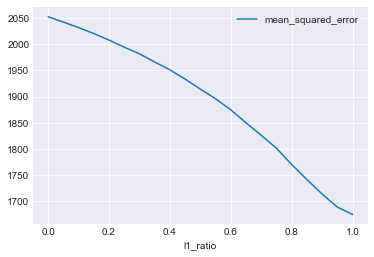

In [33]:
grid.plot('l1_ratio', 'mean_squared_error')

In [34]:
learning = range(1, 50)
print learning
params = {'eta0':learning, 'max_iter': [50]}
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

grid = pd.DataFrame(gs.grid_scores_)
grid.columns = ['eta0', 'mean_squared_error', 'cv']
grid['eta0'] = grid['eta0'].apply(lambda x: x['eta0'])
grid['mean_squared_error'] = grid['mean_squared_error'].apply(lambda x: -x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


Here it should be apparent that as the initial learning rate increases, the error should _also_ increase. 
- And what happens when the initial learning rate is too high? A dramatic increase in error. 

It's important to recognize the importance of learning rate and what values it should be set at, the smaller generally the better.

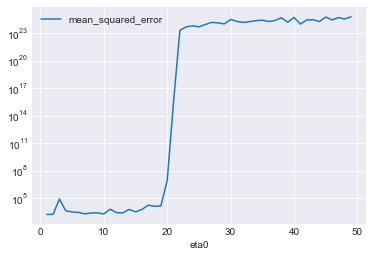

In [35]:
grid.plot('eta0', 'mean_squared_error', logy=True)